In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_data, test_data = pd.read_csv('train.csv'), pd.read_csv('test.csv')

In [5]:
train_data.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [27]:
categorical_variables = ['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','type_of_meal_plan','required_car_parking_space','room_type_reserved','market_segment_type','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','no_of_special_requests']
continuos_variables = ['lead_time','avg_price_per_room']
time_variables = ['arrival_year','arrival_month','arrival_date']
df = train_data[time_variables].copy()
df.columns = ['year','month','day']
train_data['date'] = pd.to_datetime(df,errors='coerce')

## Plots

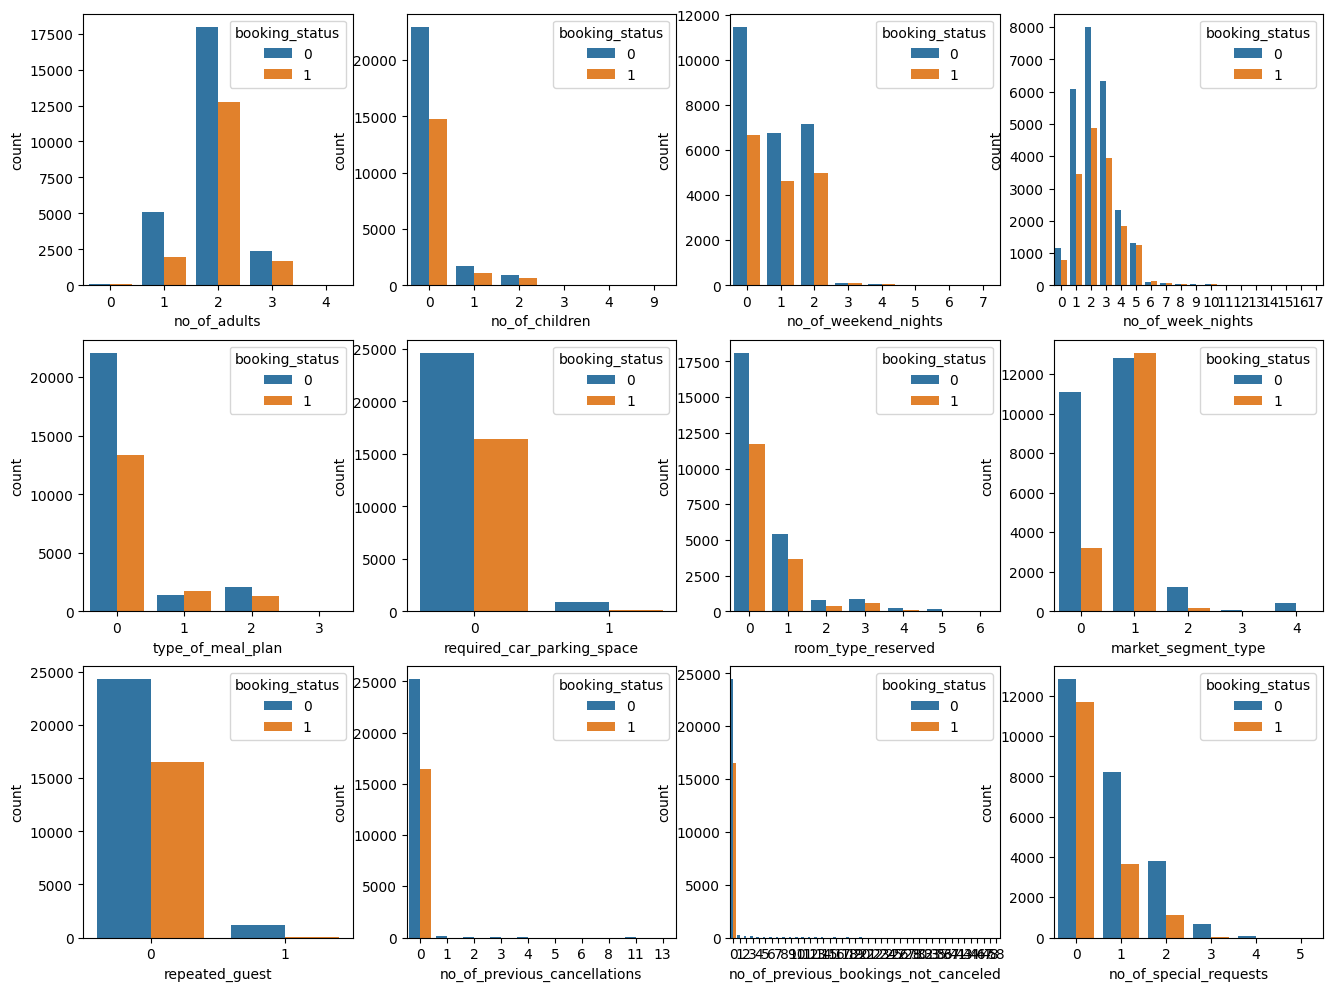

In [8]:
plt.figure(figsize=(16,12))
for i in range(len(categorical_variables)):
    plt.subplot(3,4,i+1)
    sns.countplot(x=train_data[categorical_variables[i]], hue=train_data['booking_status'])

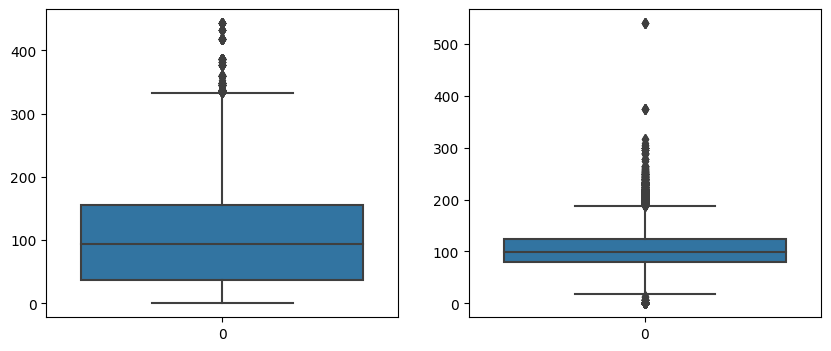

In [7]:
plt.figure(figsize=(10,4))
for i in range(len(continuos_variables)):
    plt.subplot(1,2,i+1)
    sns.boxplot(train_data[continuos_variables[i]])

<AxesSubplot: xlabel='arrival_month', ylabel='count'>

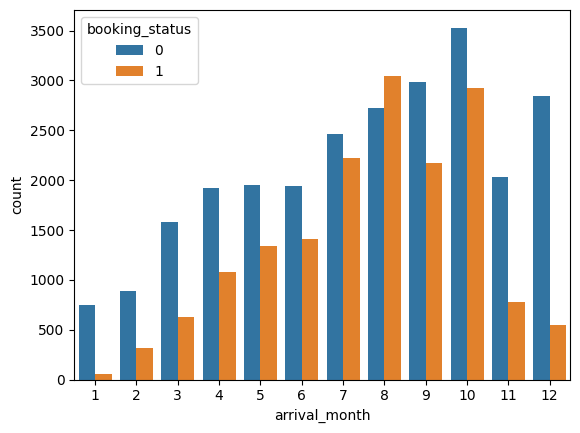

In [15]:
sns.countplot(data=train_data, x='arrival_month',hue='booking_status')

<AxesSubplot: xlabel='date', ylabel='booking_status'>

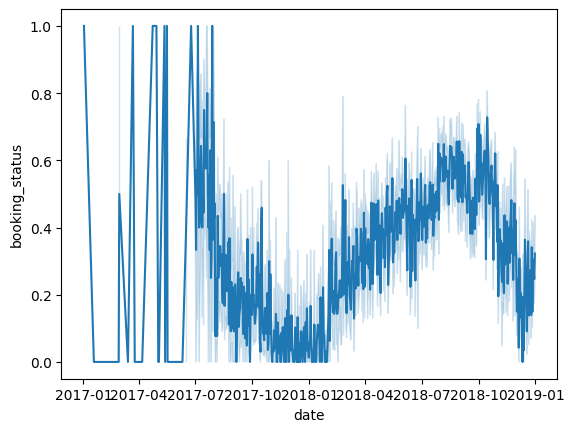

In [28]:
sns.lineplot(data=train_data, x='date', y='booking_status')

## First trial

In [24]:
y = train_data['booking_status']
x = train_data[categorical_variables+continuos_variables+time_variables]
x_test = test_data[categorical_variables+continuos_variables+time_variables]

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.1,random_state=42)

In [25]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=500, early_stopping_rounds=5)
xgb.fit(x_train,y_train,eval_set=[(x_val,y_val)])

[0]	validation_0-logloss:0.58305
[1]	validation_0-logloss:0.52270
[2]	validation_0-logloss:0.48664
[3]	validation_0-logloss:0.46212
[4]	validation_0-logloss:0.44700
[5]	validation_0-logloss:0.43704
[6]	validation_0-logloss:0.43018
[7]	validation_0-logloss:0.42547
[8]	validation_0-logloss:0.42181
[9]	validation_0-logloss:0.41897
[10]	validation_0-logloss:0.41661
[11]	validation_0-logloss:0.41516
[12]	validation_0-logloss:0.41380
[13]	validation_0-logloss:0.41213
[14]	validation_0-logloss:0.41086
[15]	validation_0-logloss:0.40910
[16]	validation_0-logloss:0.40878
[17]	validation_0-logloss:0.40867
[18]	validation_0-logloss:0.40783
[19]	validation_0-logloss:0.40717
[20]	validation_0-logloss:0.40687
[21]	validation_0-logloss:0.40525
[22]	validation_0-logloss:0.40358
[23]	validation_0-logloss:0.40285
[24]	validation_0-logloss:0.40247
[25]	validation_0-logloss:0.40253
[26]	validation_0-logloss:0.40195
[27]	validation_0-logloss:0.40121
[28]	validation_0-logloss:0.40086
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [26]:
result = xgb.predict(x_test)

df = pd.DataFrame({'id':test_data['id'].values, 'booking_status':result})
df.to_csv('submission.csv', index=False)

## Second attempt